<a href="https://colab.research.google.com/github/dayananikol/CCADMACL_EXERCISES_COM222ML/blob/main/CCADMACL_Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.drop(['show_id', 'title'], axis=1, inplace=True)

In [6]:
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')

df["release_year"] = pd.to_numeric(df["release_year"], errors='coerce')

print(df.isnull().sum())

type               0
director        2389
cast             718
country          507
date_added        98
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [7]:
import pandas as pd

# Extract the year from the 'date_added' column
df['date_added_year'] = pd.to_datetime(df['date_added']).dt.year

# Calculate the correlation between 'release_year' and 'date_added_year'
correlation = df['release_year'].corr(df['date_added_year'])

print(f"Correlation between release_year and date_added_year: {correlation}")

Correlation between release_year and date_added_year: 0.09960111834443806


In [8]:
df.drop(['release_year', 'date_added'], axis=1, inplace=True)

In [9]:
df.head()

,type,director,cast,country,rating,duration,listed_in,description,date_added_year
0,TV Show,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [10]:
df["director"].fillna("Unknown", inplace=True)

df["cast"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)

df["rating"].fillna(df["rating"].mode()[0], inplace=True)
df["date_added_year"].fillna(df["date_added_year"].mode()[0], inplace=True)

<ipython-input-10-08143e73186c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna("Unknown", inplace=True)
<ipython-input-10-08143e73186c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['date_added_year'] = le.fit_transform(df['date_added_year'])

In [12]:
df.head()

,type,director,cast,country,rating,duration,listed_in,description,date_added_year
0,TV Show,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,12
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,8
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",10
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,12


In [13]:
print("Type:\n", df["type"].value_counts(), "\n")
print("Rating:\n", df["rating"].value_counts())

Type:
 type
Movie      5377
TV Show    2410
Name: count, dtype: int64 

Rating:
 rating
TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['rating'] = le.fit_transform(df['rating'])

In [15]:
df.head()

,type,director,cast,country,rating,duration,listed_in,description,date_added_year
0,1,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,8,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,12
1,0,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,8,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,8
2,0,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,5,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",10
3,0,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,4,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9
4,0,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,4,123 min,Dramas,A brilliant group of students become card-coun...,12


In [16]:
df.isna().sum()

,0
type,0
director,0
cast,0
country,0
rating,0
duration,0
listed_in,0
description,0
date_added_year,0


In [17]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
from collections import Counter

directors = df['director']
director_counts = Counter(directors[directors != 'Unknown'])

top_10_directors = director_counts.most_common(20)

director_mapping = {director: i + 1 for i, (director, _) in enumerate(top_10_directors)}

df['director_encoded'] = df['director'].map(director_mapping).fillna(0)

print("Director Mapping:")
for director, encoded_value in director_mapping.items():
    print(f"{director}: {encoded_value}")

df.drop(['director'], axis=1, inplace=True)

Director Mapping:
Raúl Campos, Jan Suter: 1
Marcus Raboy: 2
Jay Karas: 3
Cathy Garcia-Molina: 4
Youssef Chahine: 5
Martin Scorsese: 6
Jay Chapman: 7
Steven Spielberg: 8
David Dhawan: 9
Kunle Afolayan: 10
Hakan Algül: 11
Ryan Polito: 12
Shannon Hartman: 13
Johnnie To: 14
Lance Bangs: 15
Quentin Tarantino: 16
Robert Rodriguez: 17
McG: 18
Justin G. Dyck: 19
S.S. Rajamouli: 20


In [19]:
df['director_encoded'].value_counts()

,count
director_encoded,
0.0,7583
1.0,18
2.0,16
3.0,14
4.0,13
5.0,12
6.0,12
7.0,12
8.0,10


In [20]:
df.head()

,type,cast,country,rating,duration,listed_in,description,date_added_year,director_encoded
0,1,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,8,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,12,0.0
1,0,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,8,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,8,0.0
2,0,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,5,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",10,0.0
3,0,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,4,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",9,0.0
4,0,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,4,123 min,Dramas,A brilliant group of students become card-coun...,12,0.0


In [21]:
from collections import Counter

all_countries = df['country'].str.split(', ').sum()
country_counts = Counter(all_countries)


def get_representative_country(countries_str):
    countries = countries_str.split(', ')
    if len(countries) > 1:
        return max(countries, key=lambda country: country_counts.get(country, 0))
    else:
        return countries_str

df['country'] = df['country'].apply(get_representative_country)

print(df['country'].head(10))

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
6            Egypt
7    United States
8            India
9            India
Name: country, dtype: object


In [22]:
df['country'] = df['country'].map(country_counts)

# df['country'] = le.fit_transform(df['country'])
print(df[['country']].head(10))

   country
0       88
1      154
2       39
3     3295
4     3295
5      107
6      110
7     3295
8      990
9      990


In [23]:
df['country'].value_counts()

,count
country,
3295,3295
990,957
506,506
722,484
287,228
349,215
412,207
212,188
215,168


In [24]:
df.drop(['cast', 'description'], axis=1, inplace=True)

In [25]:
df['listed_in'].head(10)

,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
5,"International TV Shows, TV Dramas, TV Mysteries"
6,"Horror Movies, International Movies"
7,Dramas
8,"Horror Movies, International Movies"
9,"Horror Movies, International Movies, Thrillers"


In [26]:
df.head()

,type,country,rating,duration,listed_in,date_added_year,director_encoded
0,1,88,8,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",12,0.0
1,0,154,8,93 min,"Dramas, International Movies",8,0.0
2,0,39,5,78 min,"Horror Movies, International Movies",10,0.0
3,0,3295,4,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",9,0.0
4,0,3295,4,123 min,Dramas,12,0.0


In [27]:
from collections import Counter

genre_mapping = {
    'Comedy': ['Comedy', 'Stand-Up Comedy','Comedies','TV Comedies','Stand-Up Comedy & Talk Shows'],
    'Anime': ['Anime Series','Anime Features'],
    'Sci-Fi & Fantasy': ['Sci-Fi & Fantasy','TV Sci-Fi & Fantasy'],
    'International TV Shows': ['Spanish-Language TV Shows', 'International TV Shows','British TV Shows','Korean TV Shows', 'TV Shows'],
    'Faith & Spirituality': ['Faith & Spirituality'],
    'Documentaries': ['Documentaries', 'Docuseries'],
    'Reality TV Shows': ['Reality TV'],
    'LGBTQ Movies': ['LGBTQ Movies'],
    'Horror': ['TV Horror', 'Horror Movies'],
    'Drama': ['TV Dramas','Dramas'],
    'Musical': ['Music & Musicals'],
    'Romance': ['Romantic TV Shows','Romantic Movies'],
    'Kids': ['Kids TV'],
    'Family': ['Children & Family Movies'],
    'Crime': ['Crime TV Shows'],
    'Action & Adventure': ['TV Action & Adventure'],
    'Classic & Cult TV': ['Classic & Cult TV','Classic Movies','Cult Movies'],
    'Mystery & Thriller': ['TV Mysteries','TV Thrillers','Thrillers'],
    'Sports': ['Sport Movies'],
    'Science': ['Science & Nature TV'],
    'International Movies': ['International Movies'],
    'Independent Movies': ['Independent Movies']
}

def normalize_genre(genre):
    for category, subgenres in genre_mapping.items():
        if genre in subgenres:
            return category
    return genre


df['listed_in'] = df['listed_in'].apply(lambda x: ', '.join([normalize_genre(genre) for genre in x.split(', ')]))


all_genres = df['listed_in'].str.split(', ').sum()
genre_counts = Counter(all_genres)

def get_representative_genre(genres_str):
    genres = genres_str.split(', ')
    if len(genres) > 1:
        return max(genres, key=lambda genre: genre_counts.get(genre, 0))
    else:
        return genres_str

df['listed_in'] = df['listed_in'].apply(get_representative_genre)

df['listed_in'].value_counts()

,count
listed_in,
Drama,2809
Comedy,1323
International Movies,1141
Documentaries,699
International TV Shows,679
Action & Adventure,252
Kids' TV,226
Family,211
Mystery & Thriller,139


In [28]:
df['listed_in'] = df['listed_in'].map(genre_counts)
# df['listed_in'] = le.fit_transform(df['listed_in'])


print(df[['listed_in']].head(10))

   listed_in
0       2809
1       2809
2       2435
3        870
4       2809
5       2809
6       2435
7       2809
8       2435
9       2435


In [29]:
df.head()

,type,country,rating,duration,listed_in,date_added_year,director_encoded
0,1,88,8,4 Seasons,2809,12,0.0
1,0,154,8,93 min,2809,8,0.0
2,0,39,5,78 min,2435,10,0.0
3,0,3295,4,80 min,870,9,0.0
4,0,3295,4,123 min,2809,12,0.0


In [30]:
df.head()

,type,country,rating,duration,listed_in,date_added_year,director_encoded
0,1,88,8,4 Seasons,2809,12,0.0
1,0,154,8,93 min,2809,8,0.0
2,0,39,5,78 min,2435,10,0.0
3,0,3295,4,80 min,870,9,0.0
4,0,3295,4,123 min,2809,12,0.0


In [31]:
# df['duration'].unique()
df.drop(['duration'], axis=1, inplace=True)

In [32]:
df.isna().sum()
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7784 entries, 0 to 7786
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              7784 non-null   int64  
 1   country           7784 non-null   int64  
 2   rating            7784 non-null   int64  
 3   listed_in         7784 non-null   int64  
 4   date_added_year   7784 non-null   int64  
 5   director_encoded  7784 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 425.7 KB


In [34]:
df.head()

,type,country,rating,listed_in,date_added_year,director_encoded
0,1,88,8,2809,12,0.0
1,0,154,8,2809,8,0.0
2,0,39,5,2435,10,0.0
3,0,3295,4,870,9,0.0
4,0,3295,4,2809,12,0.0


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_data = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)  # Keep original index

scaled_data.head()

,type,country,rating,listed_in,date_added_year,director_encoded
0,1.493277,-1.090750,0.491438,0.860146,1.081506,-0.135434
1,-0.669668,-1.044695,0.491438,0.860146,-1.828177,-0.135434
2,-0.669668,-1.124943,-1.052497,0.401235,-0.373336,-0.135434
3,-0.669668,1.147111,-1.567142,-1.519077,-1.100757,-0.135434
4,-0.669668,1.147111,-1.567142,0.860146,1.081506,-0.135434


1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [36]:
from sklearn.decomposition import PCA

features = scaled_data[['country', 'listed_in', 'rating']]
pca = PCA(n_components=3)
pca.fit(features)
PCA_df = pd.DataFrame(pca.transform(features), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,7784.0,-3.651299e-17,1.125524,-1.842182,-0.982020,-0.311859,0.740766,2.802150
col2,7784.0,-5.476948e-18,1.073577,-3.685032,-0.673085,0.001172,0.528866,3.187280
col3,7784.0,-2.738474e-17,0.762243,-3.653993,-0.463284,-0.043395,0.476599,2.508286


In [37]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

# PC4_explainedvariance = explained_variance[3]
# print("Explained variance of PC4", PC4_explainedvariance)

# PC5_explainedvariance = explained_variance[4]
# print("Explained variance of PC5", PC5_explainedvariance)

# PC6_explainedvariance = explained_variance[5]
# print("Explained variance of PC6", PC6_explainedvariance)

# PC7_explainedvariance = explained_variance[6]
# print("Explained variance of PC7", PC7_explainedvariance)

# PC8_explainedvariance = explained_variance[7]
# print("Explained variance of PC8", PC8_explainedvariance)

# PC9_explainedvariance = explained_variance[8]
# print("Explained variance of PC9", PC9_explainedvariance)

# PC10_explainedvariance = explained_variance[9]
# print("Explained variance of PC10", PC10_explainedvariance)

Explained variance of PC1 0.4222136300519287
Explained variance of PC2 0.38413989810966165
Explained variance of PC3 0.19364647183840977


2. Create a scree plot for each principal component

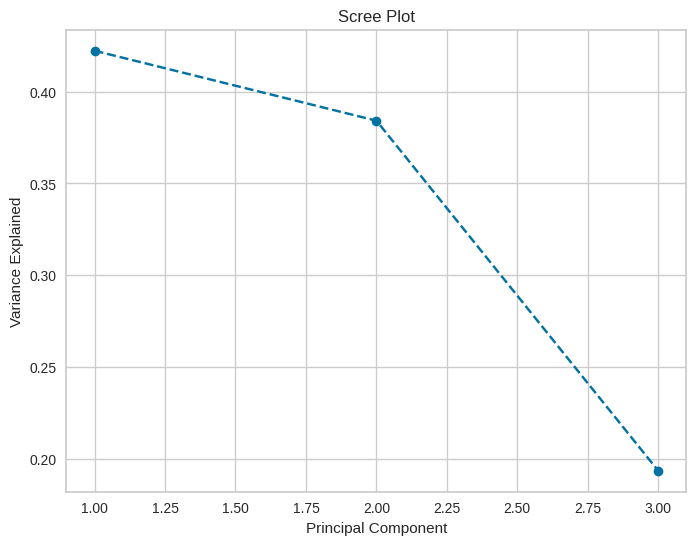

In [38]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

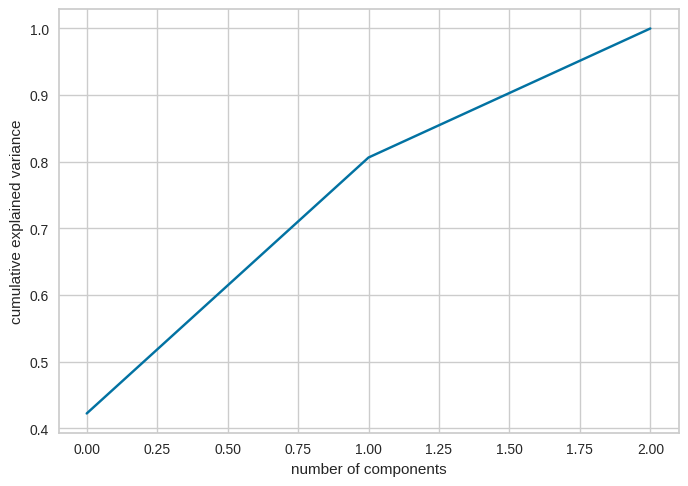

In [39]:
pca = PCA().fit(PCA_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

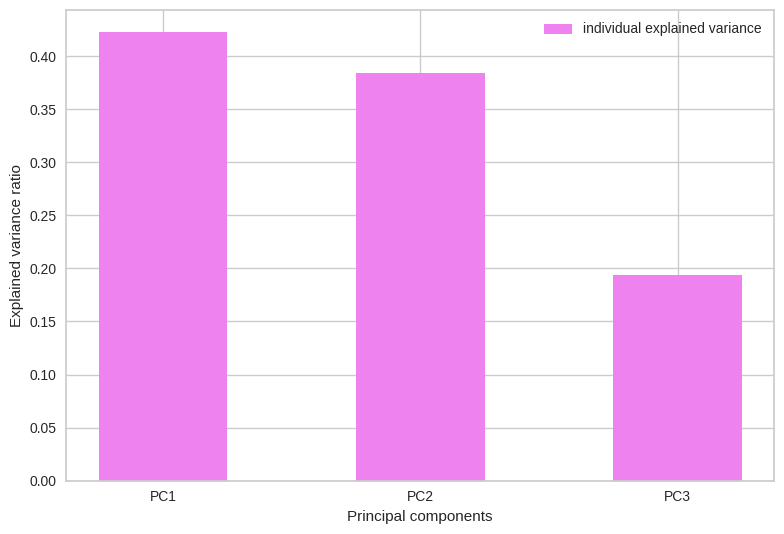

In [40]:
import matplotlib.pyplot as plt

plt.figure()
principalcomponents = ['PC1', 'PC2','PC3']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [41]:
PCA_df = pd.DataFrame({'PC1': PCA_df['col1'], 'PC2': PCA_df['col2'], 'PC3': PCA_df['col3']})
PCA_df.head()

,PC1,PC2,PC3
0,-1.459620,0.181436,0.087686
1,-1.424674,0.171948,0.116143
2,-0.889001,-0.848599,-1.011825
3,2.128022,-0.738250,-1.002946
4,0.655064,-1.982314,0.391115


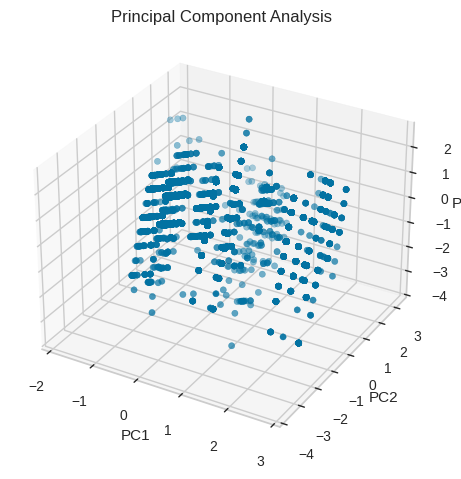

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

ax.scatter(PCA_df['PC1'], PCA_df['PC2'], PCA_df['PC3'])  # Use ax.scatter for 3D plotting
ax.set_title('Principal Component Analysis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')  # Use ax.set_zlabel for setting the z-axis label

plt.show()

3. Use any clustering algorithm to create clusters

Elbow Method to determine the number of clusters to be formed:


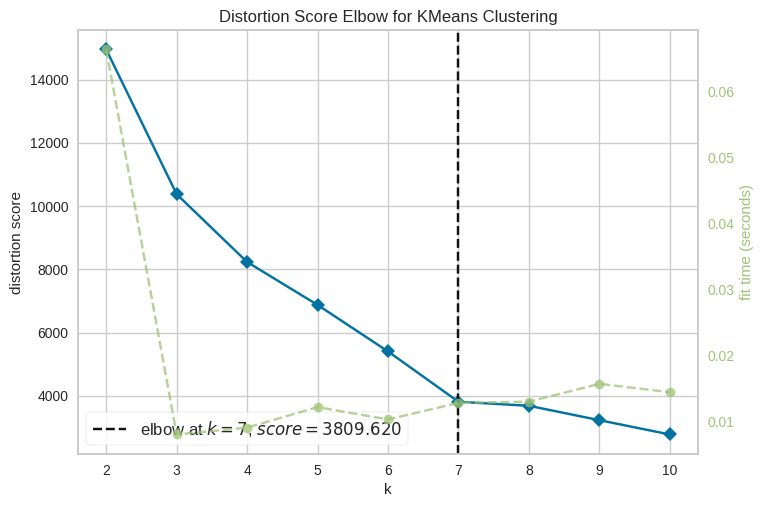

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

<ipython-input-44-8428bb533bc0>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', 5)


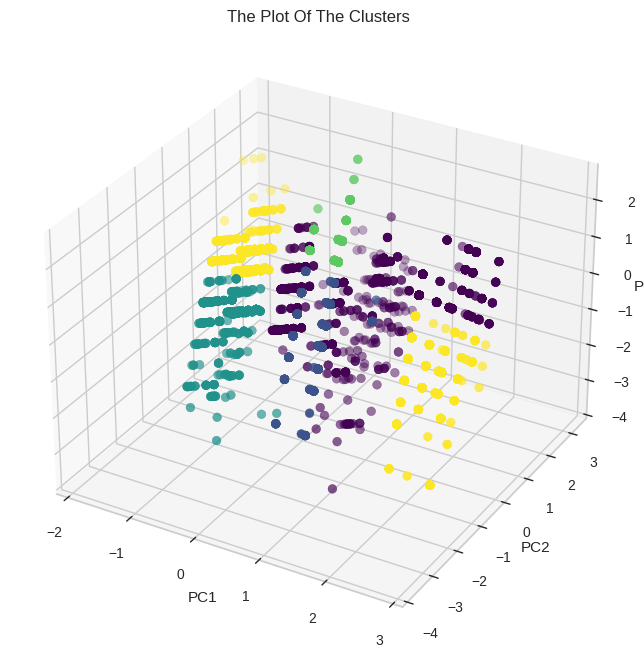

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=7)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")

x = PCA_df['PC1']
y = PCA_df['PC2']
z = PCA_df['PC3']

cmap = cm.get_cmap('viridis', 5)

ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# n_clusters = 5  # Replace with the optimal number of clusters
# agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
# PCA_df['Cluster'] = agg_clustering.fit_predict(PCA_df[['PC1', 'PC2', 'PC3']]).astype(int)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot with color-coded clusters
# ax.scatter(PCA_df['PC1'], PCA_df['PC2'], PCA_df['PC3'], c=PCA_df['Cluster'], cmap='viridis')

# ax.set_title('Agglomerative Clustering')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')

# plt.show()

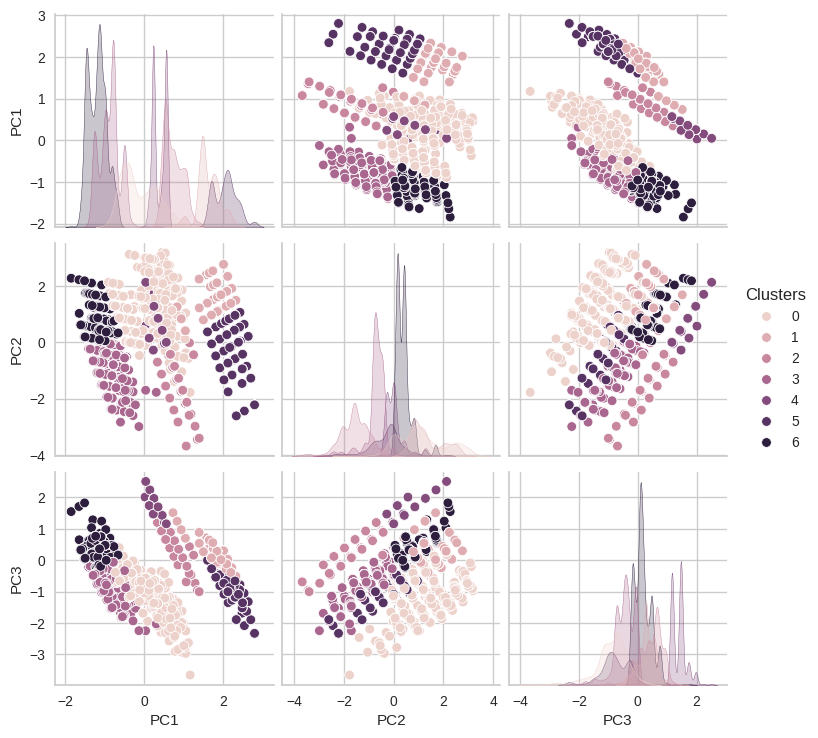

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(PCA_df, hue='Clusters')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

silhouette_avg_agg = silhouette_score(PCA_df[['PC1', 'PC2', 'PC3']], PCA_df['Clusters'])
print(f"Silhouette Score: {silhouette_avg_agg}")

Silhouette Score: 0.49804288919822953


<ipython-input-47-7c05bf41b3c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x='Clusters', data=PCA_df, palette= pal)
<ipython-input-47-7c05bf41b3c6>:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x='Clusters', data=PCA_df, palette= pal)


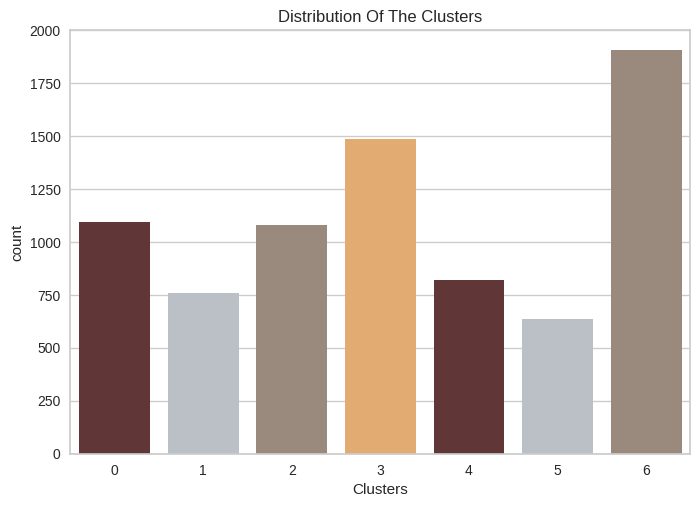

In [47]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
# Use PCA_df instead of df, as 'cluster_agg' is in PCA_df
pl = sns.countplot(x='Clusters', data=PCA_df, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-52-839f2f0bd348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
<ipython-input-52-839f2f0bd348>:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


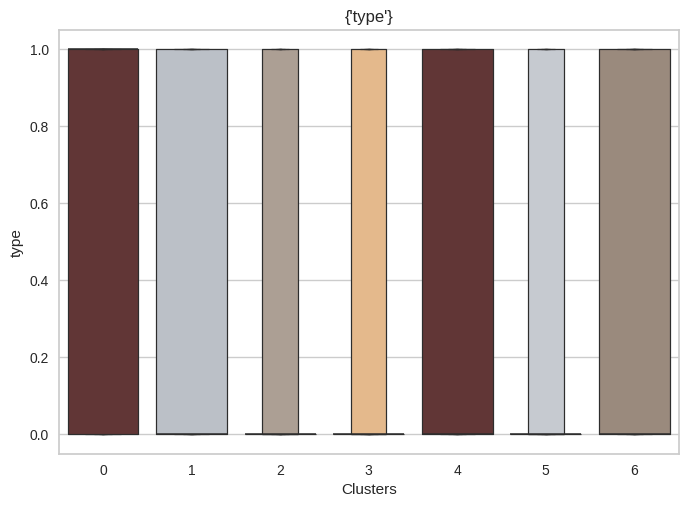

<ipython-input-52-839f2f0bd348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
<ipython-input-52-839f2f0bd348>:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


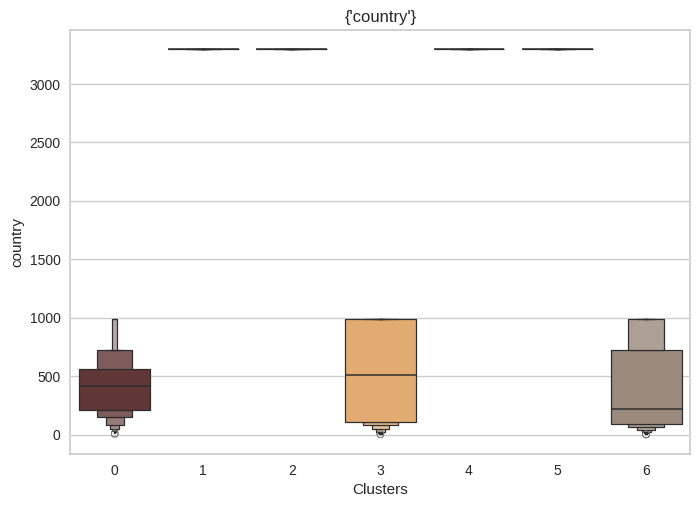

<ipython-input-52-839f2f0bd348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
<ipython-input-52-839f2f0bd348>:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


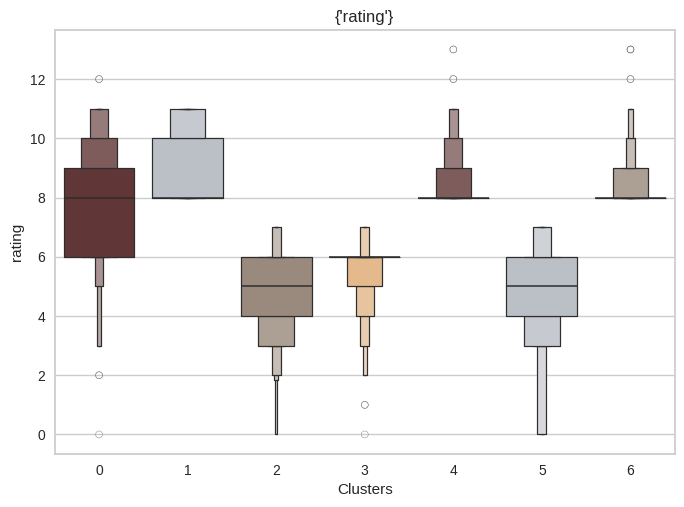

<ipython-input-52-839f2f0bd348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
<ipython-input-52-839f2f0bd348>:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


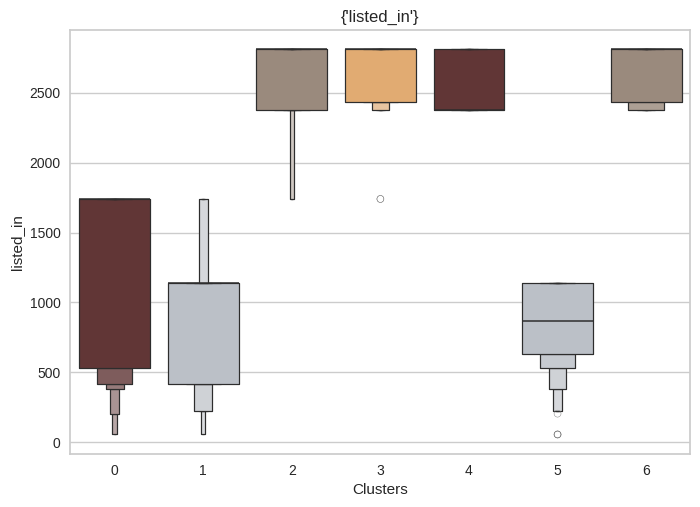

<ipython-input-52-839f2f0bd348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
<ipython-input-52-839f2f0bd348>:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


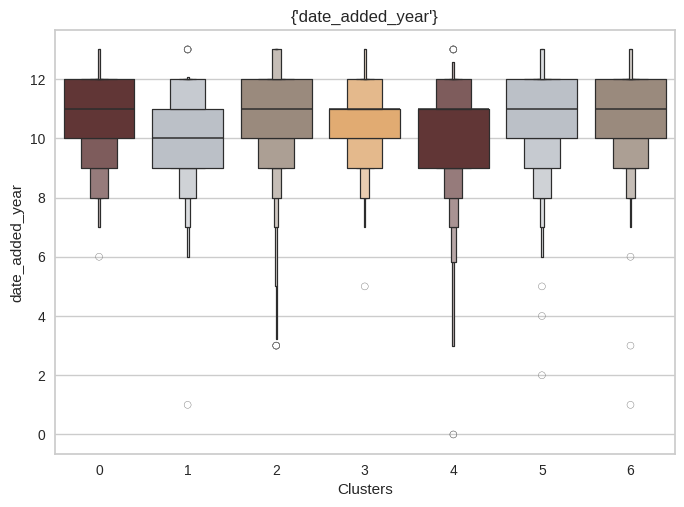

<ipython-input-52-839f2f0bd348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
<ipython-input-52-839f2f0bd348>:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


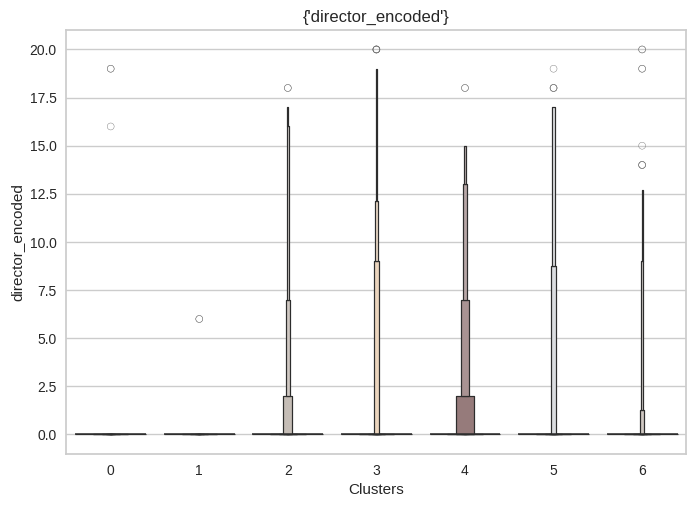

<ipython-input-52-839f2f0bd348>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
<ipython-input-52-839f2f0bd348>:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)


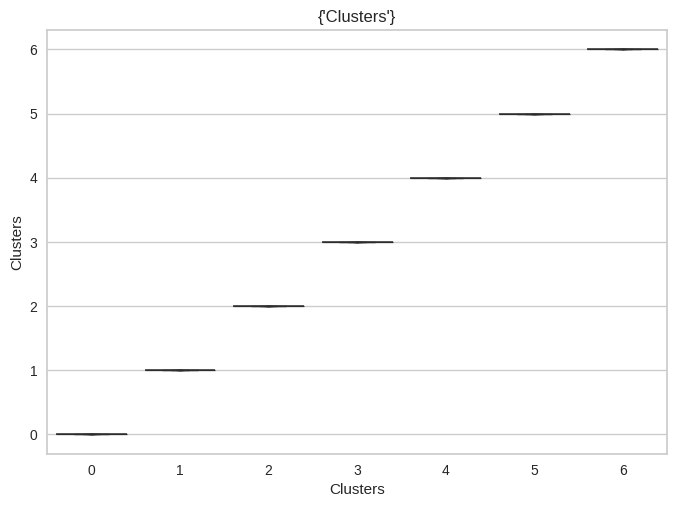

In [52]:

for col in df.columns:

  plt.figure()
  pl=sns.boxenplot(y=df[col],x=df["Clusters"], palette= pal)
  pl.set_title({col})
  plt.show()



4. Profile each cluster that you have generated based on your experiments

In [48]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

cluster_profile = df.groupby(PCA_df['Clusters']).agg(['mean', 'std', 'min', 'max'])
cluster_profile

type                        country                         \
              mean       std min max         mean          std min   max   
Clusters                                                                   
0.0       0.442009  0.496853   0   1  1317.936073  1351.337641   1  3295   
1.0       0.309618  0.462641   0   1  2128.853755  1420.554570   5  3295   
2.0       0.285449  0.451838   0   1  2010.250232  1443.176858   3  3295   
3.0       0.262946  0.440381   0   1  1296.718225  1306.927683   1  3295   
4.0       0.303289  0.459959   0   1  2105.231425  1439.706694   1  3295   
5.0       0.285039  0.451789   0   1  2160.459843  1428.658643   3  3295   
6.0       0.294488  0.455932   0   1  1360.540682  1367.277331   1  3295   

            rating                      listed_in                         \
              mean       std min max         mean         std  min   max   
Clusters                                                                   
0.0       7.421005  1.981846   0  11  1829.861187  884.847629   56  2809   
1.0       7.641634  2.022474   0  13  1691.379447  947.946516   56  2809   
2.0       6.508804  2.069674   0  11  2235.278035  719.027647   56  2809   
3.0       6.715535  1.736837   0  13  2295.818426  697.121965   56  2809   
4.0       7.313033  1.821468   0  12  2212.884287  727.192327   56  2809   
5.0       6.456693  2.126726   0  11  1849.433071  888.968258  205  2809   
6.0       7.230971  1.783499   0  13  2256.707087  737.981814   56  2809   

         date_added_year                   director_encoded                 \
                    mean       std min max             mean       std  min   
Clusters                                                                     
0.0            10.544292  1.302368   7  13         0.136986  1.351907  0.0   
1.0            10.432148  1.418059   3  13         0.111989  1.230377  0.0   
2.0            10.544949  1.452261   0  13         0.229842  1.737665  0.0   
3.0            10.519166  1.265869   3  13         0.280430  1.933981  0.0   
4.0            10.382460  1.460833   3  13         0.300853  1.767142  0.0   
5.0            10.603150  1.347971   3  13         0.277165  1.886035  0.0   
6.0            10.529134  1.401648   0  13         0.241995  1.697353  0.0   

                Clusters                    
           max      mean       std min max  
Clusters                                    
0.0       19.0  2.305023  2.274194   0   6  
1.0       17.0  2.645586  2.069270   0   6  
2.0       19.0  2.892493  1.902915   0   6  
3.0       20.0  3.380632  1.861374   0   6  
4.0       16.0  3.411693  1.836237   0   6  
5.0       19.0  3.626772  1.961999   0   6  
6.0       20.0  3.928084  2.103062   0   6